In [44]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

挂载Google Drive

In [45]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


## Load the dataname into lists

In [46]:
os.chdir("/gdrive/MyDrive/ISBI_Dataset")
X_ids = next(os.walk('train'))[2]
Y_ids = next(os.walk('label'))[2]
print(len(X_ids),len(Y_ids))
X_ids.sort()
Y_ids.sort()

30 30


In [47]:
IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT = 3, 512, 512

In [48]:
def vertical_symmetry(img_input):
    return np.array(img_input)[::-1,:,:]
    
def horizental_symmetry(img_input):
    return np.array(img_input)[:,::-1,:]

def vertical_symmetry_2D(img_input):
    return np.array(img_input)[::-1,:]
    
def horizental_symmetry_2D(img_input):
    return np.array(img_input)[:,::-1]

# ax3 = plt.subplot(121)
# ax3.imshow(vertical_symmetry(tf.keras.preprocessing.image.array_to_img(X_train[10])))
# ax4=plt.subplot(122)
# ax4.imshow(horizental_symmetry(tf.keras.preprocessing.image.array_to_img(X_train[10])))
# plt.show()

In [49]:
def cropping(img_input):
    return img_input.crop((0,0,img_input.width/2,img_input.height/2)),img_input.crop((0,img_input.height/2-1,img_input.width/2,img_input.height-1)),img_input.crop((img_input.width/2-1,0,img_input.width-1,img_input.height/2-1)),img_input.crop((img_input.width/2-1,img_input.height/2-1,img_input.width-1,img_input.height-1))

# img1,img2,img3,img4=cropping(tf.keras.preprocessing.image.array_to_img(X_train[10]))

# ax5 = plt.subplot(221)
# ax5.imshow(img1)
# ax6=plt.subplot(222)
# ax6.imshow(img2)
# ax7=plt.subplot(223)
# ax7.imshow(img3)
# ax8=plt.subplot(224)
# ax8.imshow(img4)
# plt.show()

In [58]:
X_train = np.zeros((len(X_ids)*7, 256, 256, 3), dtype=np.float32)
Y_train = np.zeros((len(Y_ids)*7, 256, 256, 1), dtype=np.bool)
X_original=np.zeros((len(X_ids),512,512,3),dtype=np.float32)
Y_original=np.zeros((len(Y_ids),512,512,1),dtype=np.float32)

n=0
m=0
for id_ in (X_ids):
    image = tf.keras.preprocessing.image.load_img(f'/gdrive/MyDrive/ISBI_Dataset/train/{id_}', target_size=(IMG_HEIGHT, IMG_WIDTH))
    # print(n,id_)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)[90:450,150:406]
    image = tf.keras.preprocessing.image.array_to_img(input_arr, ).resize((256, 256))
    original_image=tf.keras.preprocessing.image.array_to_img(input_arr, ).resize((512, 512))
    X_train[n] = np.array(image)
    X_original[m]=np.array(original_image)
    img1,img2,img3,img4=cropping(tf.keras.preprocessing.image.array_to_img(X_original[m]))
    n+=1
    X_train[n]=np.array(img1.resize((256, 256)))
    n+=1
    X_train[n]=np.array(img2.resize((256, 256)))
    n+=1
    X_train[n]=np.array(img3.resize((256, 256)))
    n+=1
    X_train[n]=np.array(img4.resize((256, 256)))
    n+=1
    X_train[n]=np.array(tf.keras.preprocessing.image.array_to_img(vertical_symmetry(tf.keras.preprocessing.image.array_to_img(X_train[temp])),).resize((256, 256)))
    n+=1
    X_train[n]=np.array(tf.keras.preprocessing.image.array_to_img(horizental_symmetry(tf.keras.preprocessing.image.array_to_img(X_train[temp])),).resize((256, 256)))
    n+=1
    m+=1

n=0
m=0
for  id_ in (Y_ids):
    image = tf.keras.preprocessing.image.load_img(f'/gdrive/MyDrive/ISBI_Dataset/label/{id_}', 
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode="grayscale")

    print(n,id_)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)[90:450,150:406]
    image = tf.keras.preprocessing.image.array_to_img(input_arr, ).resize((256, 256))
    image = tf.keras.preprocessing.image.array_to_img(input_arr, ).resize((256, 256))
    original_image=tf.keras.preprocessing.image.array_to_img(input_arr, ).resize((512, 512))
    Y_train[n] = np.array(image)[:, :, np.newaxis]
    Y_original[m]=np.array(original_image)[:, :, np.newaxis]
    
    img1,img2,img3,img4=cropping(tf.keras.preprocessing.image.array_to_img(Y_original[m]))
    n+=1
    Y_train[n]=np.array(img1.resize((256, 256)))[:, :, np.newaxis]
    n+=1
    Y_train[n]=np.array(img2.resize((256, 256)))[:, :, np.newaxis]
    n+=1
    Y_train[n]=np.array(img3.resize((256, 256)))[:, :, np.newaxis]
    n+=1
    Y_train[n]=np.array(img4.resize((256, 256)))[:, :, np.newaxis]
    n+=1
    Y_train[n]=np.array(vertical_symmetry_2D(tf.keras.preprocessing.image.array_to_img(Y_train[temp])),)[:, :, np.newaxis]
    n+=1
    Y_train[n]=np.array(horizental_symmetry_2D(tf.keras.preprocessing.image.array_to_img(Y_train[temp])),)[:, :, np.newaxis]
    n+=1
    m+=1

0 train-labels00.jpg
7 train-labels01.jpg
14 train-labels02.jpg
21 train-labels03.jpg
28 train-labels04.jpg
35 train-labels05.jpg
42 train-labels06.jpg
49 train-labels07.jpg
56 train-labels08.jpg
63 train-labels09.jpg
70 train-labels10.jpg
77 train-labels11.jpg
84 train-labels12.jpg
91 train-labels13.jpg
98 train-labels14.jpg
105 train-labels15.jpg
112 train-labels16.jpg
119 train-labels17.jpg
126 train-labels18.jpg
133 train-labels19.jpg
140 train-labels20.jpg
147 train-labels21.jpg
154 train-labels22.jpg
161 train-labels23.jpg
168 train-labels24.jpg
175 train-labels25.jpg
182 train-labels26.jpg
189 train-labels27.jpg
196 train-labels28.jpg
203 train-labels29.jpg


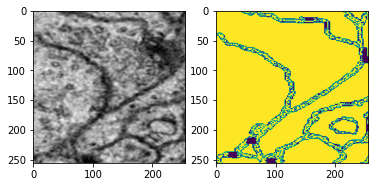

In [60]:
ax1 = plt.subplot(121)
ax1.imshow(tf.keras.preprocessing.image.array_to_img(X_train[29]))
ax2=plt.subplot(122)
ax2.imshow(tf.keras.preprocessing.image.array_to_img(Y_train[29]))
plt.show()

In [76]:
inputs = tf.keras.layers.Input((256, 256, 3))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 256, 256, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 256, 256, 16) 448         lambda_4[0][0]                   
__________________________________________________________________________________________________
dropout_36 (Dropout)            (None, 256, 256, 16) 0           conv2d_76[0][0]                  
____________________________________________________________________________________________

In [88]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=8, epochs=1000)
model.save("UNetModel.h5")

Epoch 1/1000
24/24 [==============================] - 2s 77ms/step - loss: 0.0815 - accuracy: 0.9607 - val_loss: 0.4266 - val_accuracy: 0.9131
Epoch 2/1000
24/24 [==============================] - 2s 74ms/step - loss: 0.0816 - accuracy: 0.9606 - val_loss: 0.4146 - val_accuracy: 0.9133
Epoch 3/1000
24/24 [==============================] - 2s 73ms/step - loss: 0.0816 - accuracy: 0.9606 - val_loss: 0.3966 - val_accuracy: 0.9132
Epoch 4/1000
24/24 [==============================] - 2s 73ms/step - loss: 0.0813 - accuracy: 0.9608 - val_loss: 0.4270 - val_accuracy: 0.9134
Epoch 5/1000
24/24 [==============================] - 2s 73ms/step - loss: 0.0813 - accuracy: 0.9608 - val_loss: 0.4336 - val_accuracy: 0.9135
Epoch 6/1000
24/24 [==============================] - 2s 73ms/step - loss: 0.0817 - accuracy: 0.9606 - val_loss: 0.4176 - val_accuracy: 0.9139
Epoch 7/1000
24/24 [==============================] - 2s 74ms/step - loss: 0.0816 - accuracy: 0.9606 - val_loss: 0.4195 - val_accuracy: 0.9135

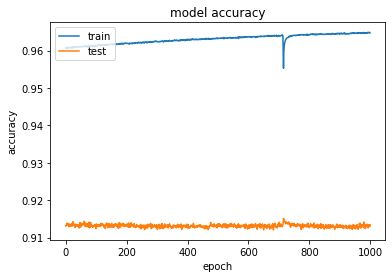

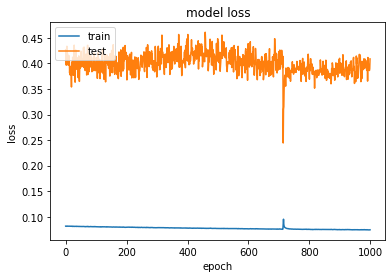

In [89]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

train-volume12.jpg


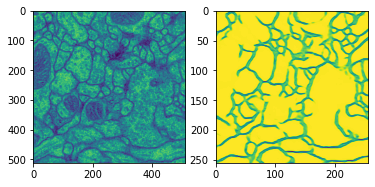

In [94]:
import random

test_id = random.choice(X_ids)
print(test_id)
img = tf.keras.preprocessing.image.load_img(f"/gdrive/MyDrive/ISBI_Dataset/train/{test_id}", target_size=(256, 256))
input_array = tf.keras.preprocessing.image.img_to_array(img)
input_array_model = np.array([input_array])
predictions = model.predict(input_array_model)
ax10=plt.subplot(121)
ax10.imshow(np.asarray(Image.open(f"/gdrive/MyDrive/ISBI_Dataset/train/{test_id}")))
ax11=plt.subplot(122)
ax11.imshow(tf.keras.preprocessing.image.array_to_img(np.squeeze(predictions)[:, :, np.newaxis]))
plt.show()

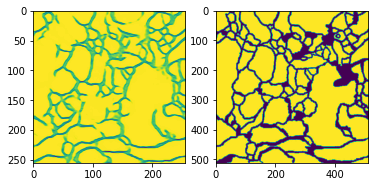

In [95]:
ax12=plt.subplot(121)
ax12.imshow(np.asarray(tf.keras.preprocessing.image.array_to_img(np.squeeze(predictions)[:, :, np.newaxis])))
ax13=plt.subplot(122)
train_id=test_id.replace('volume','labels')
ax13.imshow(np.asarray(Image.open(f"/gdrive/MyDrive/ISBI_Dataset/label/{train_id}")))
plt.show()